## 옵티마이저 실습

실습 자료:
* [Using Optimizers from PyTorch](https://machinelearningmastery.com/using-optimizers-from-pytorch/)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

In [2]:
# Creating our dataset class
class Build_Data(Dataset):    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.func = -5 * self.x + 1
        self.y = self.func + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]        
    # Getting the data
    def __getitem__(self, index):    
        return self.x[index], self.y[index]    
    # Getting length of the data
    def __len__(self):
        return self.len

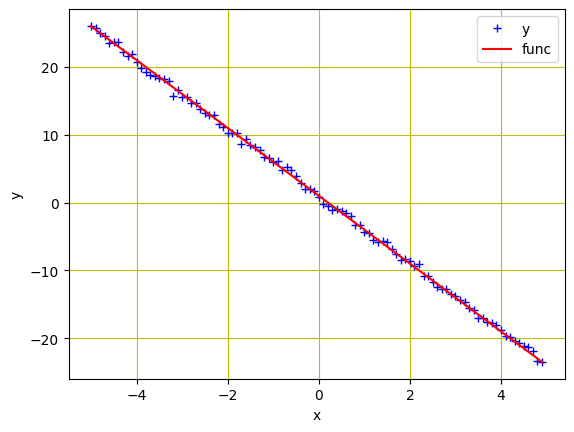

In [3]:
# Create dataset object
data_set = Build_Data()

# Plot and visualizing the data points
plt.plot(data_set.x.numpy(), data_set.y.numpy(), 'b+', label = 'y')
plt.plot(data_set.x.numpy(), data_set.func.numpy(), 'r', label = 'func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

In [4]:
model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()

print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0548]], requires_grad=True), Parameter containing:
tensor([0.7313], requires_grad=True)]


In [5]:
# 이렇게 할 수도 있음을 보여주기 위한 예시
model.state_dict()['weight'][0] = -10
model.state_dict()['bias'][0] = -20

In [6]:
# Creating Dataloader object
trainloader = DataLoader(dataset = data_set, batch_size=1)

## SGD

In [7]:
# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [8]:
loss_SGD = []
n_iter = 20

for i in range(n_iter):
    for x, y in trainloader:
        # making a pridiction in forward pass
        y_hat = model(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # store loss into list
        loss_SGD.append(loss.item())
        # zeroing gradients after each iteration
        optimizer.zero_grad()
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updateing the parameters after each iteration
        optimizer.step()

## Adam

In [9]:
model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()

# Creating Dataloader object
trainloader = DataLoader(dataset = data_set, batch_size=1)

# define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

loss_Adam = []
n_iter = 20

for i in range(n_iter):
    for x, y in trainloader:
        # making a pridiction in forward pass
        y_hat = model(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # store loss into list
        loss_Adam.append(loss.item())
        # zeroing gradients after each iteration
        optimizer.zero_grad()
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updateing the parameters after each iteration
        optimizer.step()

## 그래프 그리기

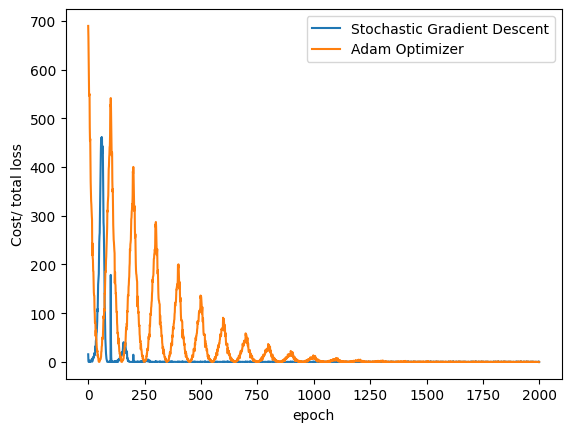

In [10]:
plt.plot(loss_SGD,label = "Stochastic Gradient Descent")
plt.plot(loss_Adam,label = "Adam Optimizer")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()